In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics.pairwise import euclidean_distances

In [15]:
plt.style.context('ggplot');

In [32]:
colors = np.array(sns.color_palette('Set2',50))

## Summer GPS data

In [5]:
dane = pd.read_csv("Data/summer-travel-gps-full.csv").iloc[:,:3]
dane.head(10)

,lat,lon,date
0,51.481292,-0.451011,05/14/2014 09:07
1,51.474005,-0.450999,05/14/2014 09:22
2,51.478199,-0.446081,05/14/2014 10:51
3,51.478199,-0.446081,05/14/2014 11:24
4,51.474146,-0.451562,05/14/2014 11:38
5,51.480146,-0.441103,05/14/2014 12:23
6,51.479669,-0.441024,05/14/2014 12:38
7,38.781775,-9.137544,05/14/2014 15:11
8,38.774422,-9.129195,05/14/2014 15:25
9,38.771939,-9.128911,05/14/2014 15:41


In [18]:
X.shape

(1759, 2)

In [10]:
X = dane.iloc[:,:2]

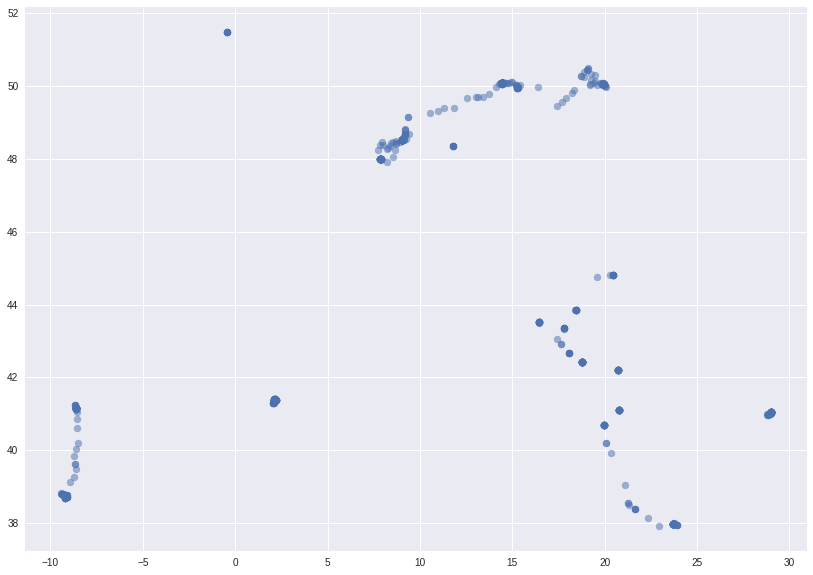

In [38]:
plt.figure(figsize=(14,10))
plt.scatter(dane.iloc[:,1],dane.iloc[:,0],alpha=0.5)
plt.show()

### K-means

In [26]:
c_min = 10
c_max = 40
inertia = []
sil_score = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for cluster in range(c_min,c_max):
    kmeans = KMeans(cluster)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled,kmeans_labels)
    inertia.append(kmeans.inertia_)
    sil_score.append(sil)

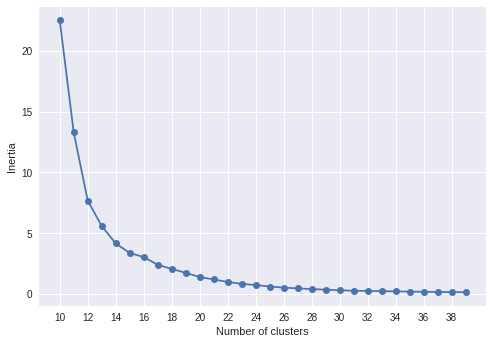

In [27]:
plt.plot(np.arange(c_min,c_max),inertia,'o-')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(c_min,c_max,2))
plt.ylabel('Inertia')
plt.show()

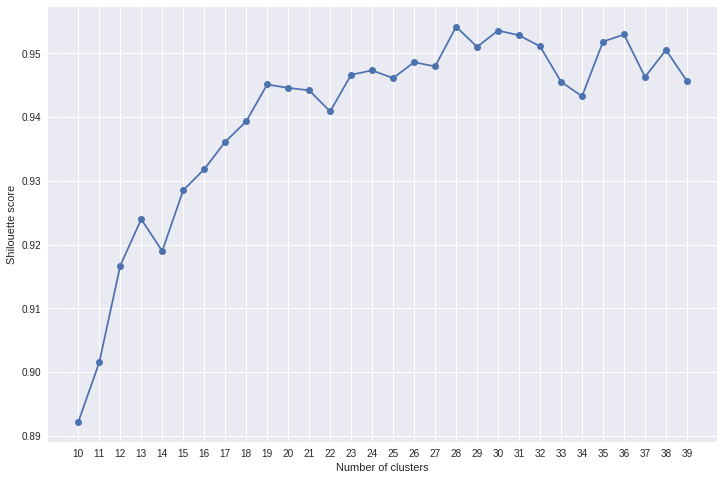

In [28]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(c_min,c_max),sil_score,'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Shilouette score')
plt.xticks(np.arange(c_min,c_max,1))
plt.show()

In [145]:
k_opt = 28
kmeans = KMeans(k_opt)
kmeans_labels = kmeans.fit_predict(X)

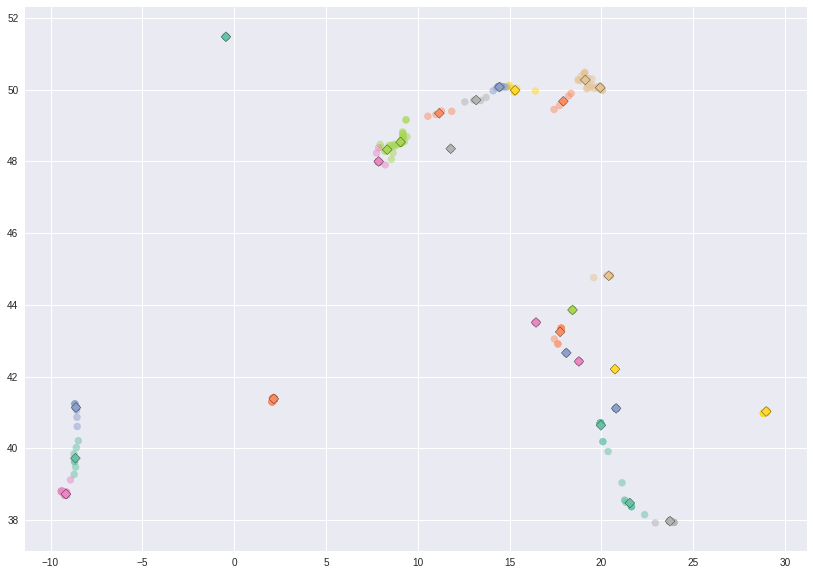

In [146]:
plt.figure(figsize=(14,10))
plt.scatter(X.iloc[:,1],X.iloc[:,0],c= colors[kmeans_labels],alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],
             c= colors, marker='D', edgecolor = 'black')
plt.show();

In [147]:
centers = pd.DataFrame(
    {'lat':kmeans.cluster_centers_[:,0],
    'lon': kmeans.cluster_centers_[:,1]})

In [148]:
centers.head()

,lat,lon
0,40.641590,19.969341
1,41.381009,2.156992
2,50.076425,14.444061
3,38.723449,-9.162781
4,48.330511,8.335697


### Merge with lat and long of European cities

In [149]:
cities = pd.read_csv('Data/european_cities_us_standard.csv')

In [150]:
cities.columns = ['name','country','lat','lon']

In [151]:
cities.head()

,name,country,lat,lon
0,Andorra la Vella,AD,42.5000,1.5000
1,Canillo,AD,42.5833,1.6667
2,Encamp,AD,42.5333,1.6333
3,Escaldes-Engordany,AD,42.5000,1.5667
4,La Massana,AD,42.5667,1.4833


In [152]:
cities.shape

(252781, 4)

In [153]:
centers.shape

(28, 2)

In [154]:
distances = euclidean_distances(centers,cities[["lat","lon"]])

In [155]:
distances.shape

(28, 252781)

In [156]:
distances_sorted_arg = np.argsort(distances,axis=1)

In [157]:
distances_sorted= np.sort(distances,axis=1)

In [158]:
distances_sorted[:,0]

array([ 0.83712771,  0.01254117,  0.02463948,  0.03003062,  0.04349819,
        0.0106465 ,  0.03682963,  2.60120222,  0.04110358,  0.20853575,
        0.00535659,  0.30171707,  0.02057319,  0.3014824 ,  1.09566136,
        0.04448166,  2.45227186,  0.01435381,  0.00485497,  0.01984378,
        0.15369915,  0.00362686,  0.02870225,  0.02152753,  0.01514713,
        0.02560623,  0.01222471,  0.02957787])

In [159]:
spots = np.array(cities['name'][distances_sorted_arg[:,0]])

In [160]:
spots

array(['Radolista', 'Barcelona', 'Vinohrady', 'Lisboa', 'Schenkenzell',
       'Istanbul', 'Mys?owice', 'Cesme', 'Feltham', 'Prud', 'Cal - Quint',
       'Vitaljina', 'Tbingen', 'Golema Recica', 'Ilok', 'Marzling',
       'Ljubojno', 'Kletn', 'Ohrid', 'Split', 'Pridvorje', 'Hlzov',
       'Krakw', 'N?any', 'Barrocaria', 'Wendelstein', 'Dubrovnik',
       'Freiburg im Breisgau'], dtype=object)

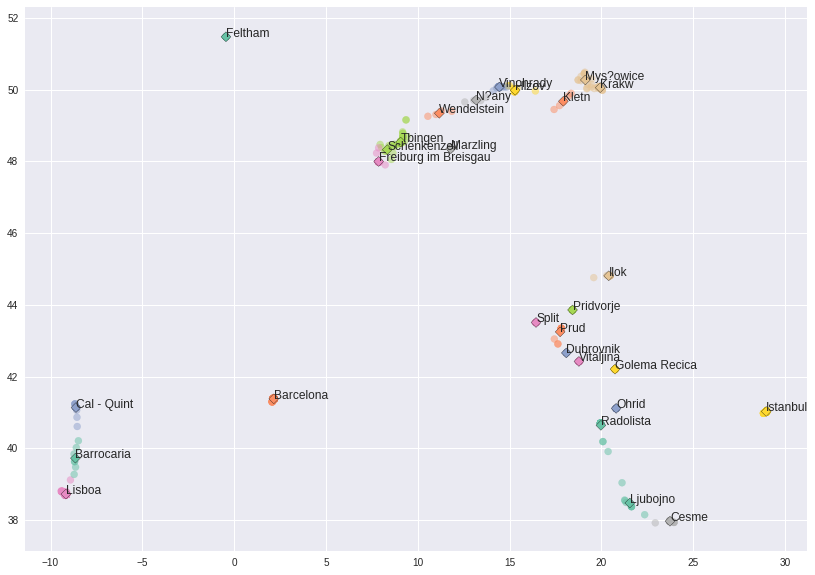

In [161]:
plt.figure(figsize=(14,10))
plt.scatter(X.iloc[:,1],X.iloc[:,0],c= colors[kmeans_labels],alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],
             c= colors, marker='D', edgecolor = 'black')
for ind,spot in enumerate(spots):
    plt.text(kmeans.cluster_centers_[ind,1],kmeans.cluster_centers_[ind,0],spot)
plt.show();